In [5]:
pip install tensorflow==1.15.2

Note: you may need to restart the kernel to use updated packages.


In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv

In [45]:
def labelImage(img, sess):
# Read and preprocess an image.
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB

    # Run the model
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})

    # Visualize detected bounding boxes.
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.4:
            insect="insect"
            label1 = str( score * 100)
            label = "{}: {:.2f}%".format(insect, score* 100)
            x = bbox[1] * cols
            y = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)
            cv.putText(img,label,(int(x), int(y)),cv.FONT_HERSHEY_SIMPLEX, 0.7, (125, 255, 51), thickness=2)
    return img

In [46]:
with tf.gfile.FastGFile('frozen_inference_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


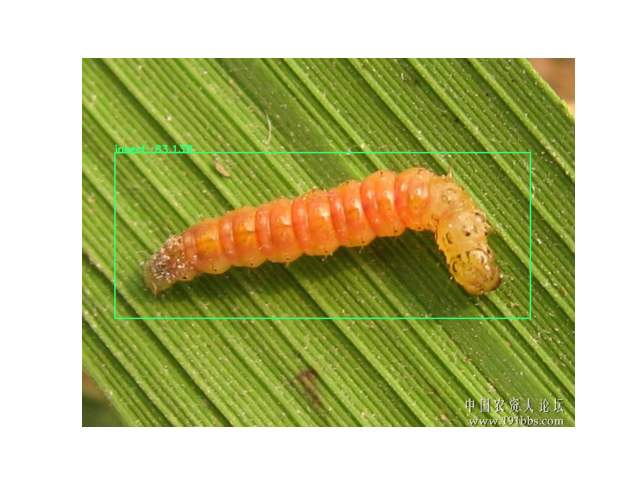

In [47]:

%matplotlib notebook
with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    image = cv.imread('IP000000050.jpg')
    new_image = labelImage(image, sess)
    print(type(new_image))
    new_image = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)
    plt.imshow(new_image)
    plt.grid(False)
    plt.axis('off')
    plt.show()